# Report Analysis with Walmart Data

In [1]:
import pandas as pd
import numpy as np
from math import sqrt
from datetime import date
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.metrics import mean_squared_error

In [2]:
datasets=pd.read_csv("Walmart_Store_Sales.csv")

In [3]:
datasets

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [4]:
datasets.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [5]:
datasets.shape

(6435, 8)

In [6]:
datasets.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [7]:
datasets.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

## Store has maximum sales

In [8]:
sales_list=[]
sales_list=datasets.groupby(['Store'])['Weekly_Sales'].sum()
max_sales=max(datasets.groupby(['Store'])['Weekly_Sales'].sum())
sales_list

Store
1     2.224028e+08
2     2.753824e+08
3     5.758674e+07
4     2.995440e+08
5     4.547569e+07
6     2.237561e+08
7     8.159828e+07
8     1.299512e+08
9     7.778922e+07
10    2.716177e+08
11    1.939628e+08
12    1.442872e+08
13    2.865177e+08
14    2.889999e+08
15    8.913368e+07
16    7.425243e+07
17    1.277821e+08
18    1.551147e+08
19    2.066349e+08
20    3.013978e+08
21    1.081179e+08
22    1.470756e+08
23    1.987506e+08
24    1.940160e+08
25    1.010612e+08
26    1.434164e+08
27    2.538559e+08
28    1.892637e+08
29    7.714155e+07
30    6.271689e+07
31    1.996139e+08
32    1.668192e+08
33    3.716022e+07
34    1.382498e+08
35    1.315207e+08
36    5.341221e+07
37    7.420274e+07
38    5.515963e+07
39    2.074455e+08
40    1.378703e+08
41    1.813419e+08
42    7.956575e+07
43    9.056544e+07
44    4.329309e+07
45    1.123953e+08
Name: Weekly_Sales, dtype: float64

In [9]:
for i in range(1,46):
    if max_sales==sales_list[i]:
        print("Store which has maximum sales of {} is {}".format(max_sales,i))

Store which has maximum sales of 301397792.46000004 is 20


### Store which has maximum sales of 301397792.46000004 is 20

## Store has maximum standard deviation

In [10]:
std_dev=[]
std_dev=datasets.groupby(['Store'])['Weekly_Sales'].std()
max_std=max(datasets.groupby(['Store'])['Weekly_Sales'].std())
print(std_dev)

Store
1     155980.767761
2     237683.694682
3      46319.631557
4     266201.442297
5      37737.965745
6     212525.855862
7     112585.469220
8     106280.829881
9      69028.666585
10    302262.062504
11    165833.887863
12    139166.871880
13    265506.995776
14    317569.949476
15    120538.652043
16     85769.680133
17    112162.936087
18    176641.510839
19    191722.638730
20    275900.562742
21    128752.812853
22    161251.350631
23    249788.038068
24    167745.677567
25    112976.788600
26    110431.288141
27    239930.135688
28    181758.967539
29     99120.136596
30     22809.665590
31    125855.942933
32    138017.252087
33     24132.927322
34    104630.164676
35    211243.457791
36     60725.173579
37     21837.461190
38     42768.169450
39    217466.454833
40    119002.112858
41    187907.162766
42     50262.925530
43     40598.413260
44     24762.832015
45    130168.526635
Name: Weekly_Sales, dtype: float64


In [11]:
for i in range(1,46):
    if max_std==std_dev[i]:
        print('Store which has maximum standard deviation of {} is {}'.format(max_std,i))

Store which has maximum standard deviation of 317569.9494755081 is 14


### Store which has maximum standard deviation of 317569.9494755081 is 14

In [12]:
df_safe=datasets

In [13]:
datasets["Date"]=pd.to_datetime(datasets["Date"])

In [14]:
#Third Quartile Period
date_from=pd.Timestamp(date(2012,7,1))
date_to = pd.Timestamp(date(2012,9,1))

In [15]:
df_safe = df_safe[
    (df_safe['Date'] > date_from ) &
    (df_safe['Date'] < date_to)]

In [16]:
df_safe

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
122,1,2012-08-06,1697230.96,0,78.30,3.452,221.749484,7.143
127,1,2012-07-13,1527014.04,0,77.12,3.256,221.924158,6.908
128,1,2012-07-20,1497954.76,0,80.42,3.311,221.932727,6.908
129,1,2012-07-27,1439123.71,0,82.66,3.407,221.941295,6.908
132,1,2012-08-17,1597868.05,0,84.85,3.571,222.038411,6.908
...,...,...,...,...,...,...,...,...
6421,45,2012-07-27,711671.58,0,77.20,3.647,191.165566,8.684
6424,45,2012-08-17,722496.93,0,75.71,3.807,191.228492,8.684
6425,45,2012-08-24,718232.26,0,72.62,3.834,191.344887,8.684
6426,45,2012-08-31,734297.87,0,75.09,3.867,191.461281,8.684


##  Store has good quarterly growth rate in Q3’2012

In [17]:
Q3_growth=[]
Q3_growth=df_safe.groupby(['Store'])['Weekly_Sales'].sum()
max_Q3_growth=max(df_safe.groupby(['Store'])['Weekly_Sales'].sum())
print(Q3_growth)
print(max_Q3_growth)

Store
1     12497164.63
2     15068546.49
3      3309539.61
4     17184755.18
5      2616077.17
6     12602014.74
7      5145719.21
8      7287654.54
9      4379738.32
10    14244984.38
11    10859741.55
12     7975256.52
13    16547587.90
14    13476932.21
15     4749680.33
16     4439284.00
17     7691713.66
18     8487908.30
19    11238000.13
20    16441784.91
21     5705679.85
22     8011276.00
23    11874225.21
24    11036817.80
25     5660441.24
26     8477063.95
27    13966116.82
28     9985386.04
29     4169231.08
30     3428281.56
31    11035442.71
32     9545018.65
33     2116785.52
34     7672976.76
35     7047799.89
36     2393072.59
37     4150660.97
38     3437491.66
39    12930297.16
40     7972353.84
41    11238592.05
42     4551141.89
43     4935069.08
44     2677995.56
45     5935775.03
Name: Weekly_Sales, dtype: float64
17184755.18


In [18]:
for i in range(1,46):
    if max_Q3_growth==Q3_growth[i]:
        print('Store which has maximum Q3 growth of {} is {}'.format(max_Q3_growth,i))

Store which has maximum Q3 growth of 17184755.18 is 4


### Store which has maximum Q3 growth of 17184755.18 is 4

## Holidays which have higher sales

In [19]:
Christmas_sales=datasets.loc[(datasets["Date"]=="2010-12-31") | (datasets["Date"]=="2011-12-31") | (datasets["Date"]=="2012-12-28") | (datasets["Date"]=="2013-12-")]
Christmas_sales

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838
190,2,2010-12-31,1750434.55,1,47.30,2.943,211.064774,8.163
333,3,2010-12-31,382677.76,1,53.20,2.943,214.698647,7.564
476,4,2010-12-31,1794868.74,1,38.09,2.955,127.087677,7.127
619,5,2010-12-31,298180.18,1,49.79,2.943,211.956714,6.768
762,6,2010-12-31,1464050.02,1,49.14,2.943,212.914967,7.007
905,7,2010-12-31,729572.08,1,13.76,2.829,191.255700,9.137
1048,8,2010-12-31,773586.49,1,41.47,2.943,214.744730,6.433
1191,9,2010-12-31,459770.85,1,45.92,2.943,214.926813,6.560
1334,10,2010-12-31,1707298.14,1,49.67,3.148,127.087677,9.003


In [20]:
print ("Total sales in christmas holidays is {}" .format(Christmas_sales["Weekly_Sales"].sum()))

Total sales in christmas holidays is 40432519.0


In [21]:
Thanksgivings=datasets.loc[(datasets["Date"]=="2010-11-26") | (datasets["Date"]=="2011-11-25") | (datasets["Date"]=="2012-11-23") | (datasets["Date"]=="2013-11-29")]
Thanksgivings

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838
94,1,2011-11-25,2033320.66,1,60.14,3.236,218.467621,7.866
185,2,2010-11-26,2658725.29,1,62.98,2.735,211.406287,8.163
237,2,2011-11-25,2614202.30,1,56.36,3.236,218.113027,7.441
328,3,2010-11-26,565567.84,1,68.71,2.735,215.061402,7.564
...,...,...,...,...,...,...,...,...
6100,43,2011-11-25,669965.22,1,55.70,3.236,210.088857,10.148
6191,44,2010-11-26,307646.50,1,28.22,2.830,126.669267,7.610
6243,44,2011-11-25,309129.01,1,38.89,3.445,129.836400,6.078
6334,45,2010-11-26,1182500.16,1,46.15,3.039,182.783277,8.724


In [22]:
print ("Total sales in Thanksgiving holidays is {}" .format(Thanksgivings["Weekly_Sales"].sum()))

Total sales in Thanksgiving holidays is 132414608.5


In [23]:
Labour_Day=datasets.loc[(datasets["Date"]=="2010-09-10") | (datasets["Date"]=="2011-09-09") | (datasets["Date"]=="2012-09-07") | (datasets["Date"]=="2013-09-06")]
Labour_Day

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
83,1,2011-09-09,1540471.24,1,76.00,3.546,215.861056,7.962
226,2,2011-09-09,1748000.65,1,77.97,3.546,215.514829,7.852
369,3,2011-09-09,377347.49,1,81.72,3.546,219.213531,7.567
512,4,2011-09-09,2093139.01,1,73.34,3.554,129.368613,5.644
655,5,2011-09-09,321110.22,1,79.04,3.546,216.422682,6.529
798,6,2011-09-09,1483574.38,1,80.21,3.546,217.398030,6.925
941,7,2011-09-09,613135.23,1,45.61,3.566,194.638785,8.622
1084,8,2011-09-09,848358.09,1,69.01,3.546,219.260435,6.425
1227,9,2011-09-09,528784.86,1,75.65,3.546,219.445767,6.404
1370,10,2011-09-09,1670579.82,1,89.06,3.771,129.368613,8.257


In [24]:
print ("Total sales in Labour day is {}" .format(Labour_Day["Weekly_Sales"].sum()))

Total sales in Labour day is 46763227.529999994


In [25]:
Super_Bowl=datasets.loc[(datasets["Date"]=="2010-02-12") | (datasets["Date"]=="2011-02-11") | (datasets["Date"]=="2012-02-10") | (datasets["Date"]=="2013-02-08")]
Super_Bowl

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment


In [26]:
Super_Bowl["Weekly_Sales"].sum()

0.0

In [27]:
print("Holidays which have higher sales is Thanksgivings. The total weekly sales of thanksgiving holidays is",Thanksgivings["Weekly_Sales"].sum())

Holidays which have higher sales is Thanksgivings. The total weekly sales of thanksgiving holidays is 132414608.5


### Holidays which have higher sales is Thanksgivings. The total weekly sales of thanksgiving holidays is 132414608.5

In [28]:
datasets["Year"]= pd.DatetimeIndex(datasets['Date']).year
datasets["Month"]= pd.DatetimeIndex(datasets['Date']).month

In [29]:
datasets

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10


In [30]:
year_2010=datasets.loc[datasets["Year"]==2010]
year_2011=datasets.loc[datasets["Year"]==2011]
year_2012=datasets.loc[datasets["Year"]==2012]

## Monthly view of sales for each year

Text(0.5, 1.0, 'Monthly view of sales in 2010')

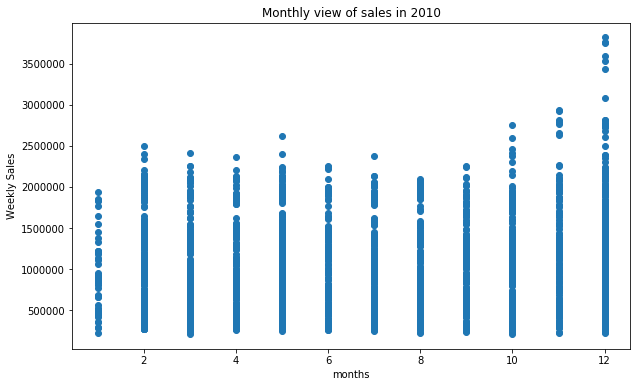

In [31]:
plt.figure(figsize=(10,6))
plt.scatter(year_2010["Month"],year_2010["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2010")

Text(0.5, 1.0, 'Monthly view of sales in 2011')

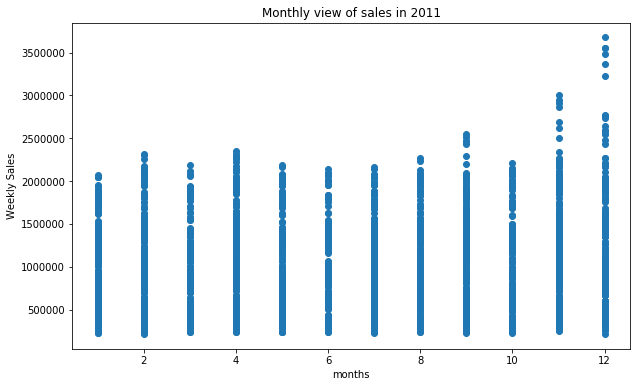

In [32]:
plt.figure(figsize=(10,6))
plt.scatter(year_2011["Month"],year_2011["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2011")

Text(0.5, 1.0, 'Monthly view of sales in 2012')

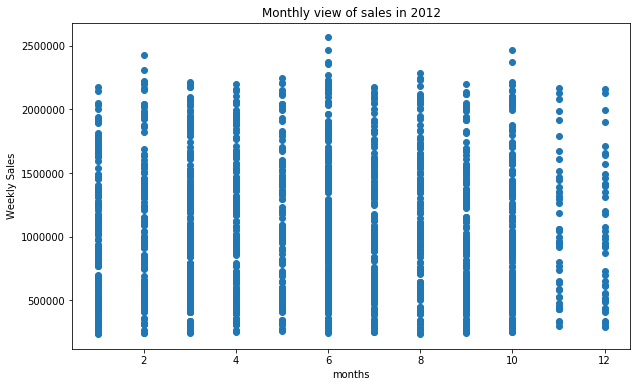

In [33]:
plt.figure(figsize=(10,6))
plt.scatter(year_2012["Month"],year_2012["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales in 2012")

## Complete monthly view of sales

Text(0.5, 1.0, 'Monthly view of sales')

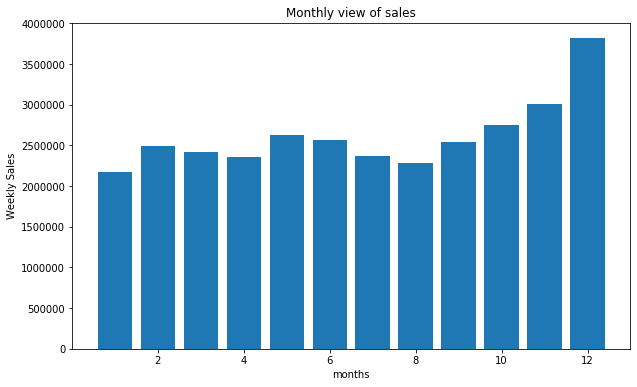

In [34]:
plt.figure(figsize=(10,6))
plt.bar(datasets["Month"],datasets["Weekly_Sales"])
plt.xlabel("months")
plt.ylabel("Weekly Sales")
plt.title("Monthly view of sales")

## Semester view of sales

In [35]:
semester_sales=[]
semester_sales.append(year_2010.loc[year_2010["Month"]<7,["Weekly_Sales"]].sum())
semester_sales.append(year_2010.loc[year_2010["Month"]>6,["Weekly_Sales"]].sum())
semester_sales.append(year_2011.loc[year_2011["Month"]<7,["Weekly_Sales"]].sum())
semester_sales.append(year_2011.loc[year_2011["Month"]>6,["Weekly_Sales"]].sum())
semester_sales.append(year_2012.loc[year_2012["Month"]<7,["Weekly_Sales"]].sum())
semester_sales.append(year_2012.loc[year_2012["Month"]>6,["Weekly_Sales"]].sum())

In [36]:
semester_names=["sem1_2010","sem2_2010","sem1_2011","sem2_2011","sem1_2012","sem2_2012"]

Text(0.5, 1.0, 'Semester view of sales')

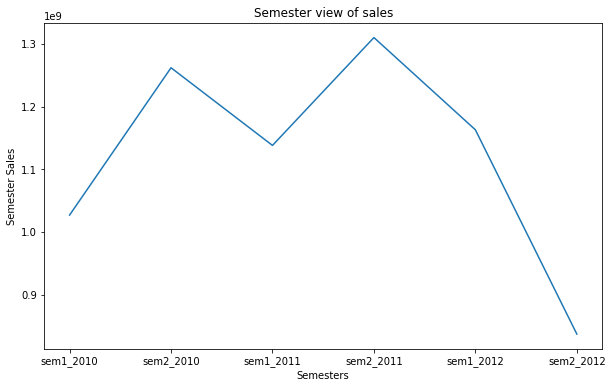

In [37]:
plt.figure(figsize=(10,6))
plt.plot(semester_names,semester_sales)
plt.xlabel("Semesters")
plt.ylabel("Semester Sales")
plt.title("Semester view of sales")

In [38]:
datasets

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5
...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10


# Linear Regression Model

In [39]:
x=datasets.drop(["Weekly_Sales","Date"],axis=1)
y=datasets["Weekly_Sales"]

In [40]:
linreg=LinearRegression(n_jobs=-1)

In [41]:
xtrain,xtest,ytrain,ytest=model_selection.train_test_split(x,y,test_size=0.4,random_state=42)

In [42]:
linreg.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [43]:
print(linreg.intercept_)
print(linreg.coef_)

80380267.57798947
[-15063.98405298  16701.66272831   -806.19443715  47215.71929544
  -2175.95412712 -26362.8254153  -39081.36479694  11681.52115132]


In [44]:
x.columns

Index(['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'Year', 'Month'],
      dtype='object')

In [45]:
features=['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month'],

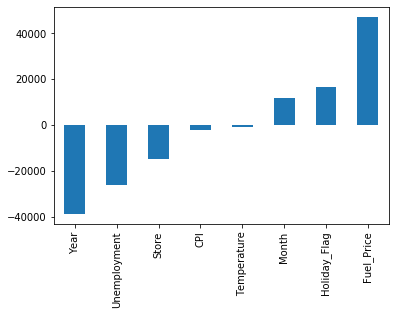

In [46]:
relation=pd.Series(linreg.coef_,x.columns).sort_values()
relation.plot(kind="bar")

## The plot shows that fuel price have greater positive impact on weekly sales. Unemployment also has certain negative impact on weekly sales. CPI has least impact towards weekly sales.

In [47]:
print(format(linreg.score(xtest,ytest)))

0.14998336593087003


In [48]:
print(sqrt(mean_squared_error(ytrain,linreg.predict(xtrain))))

522629.1662854094


In [49]:
print(sqrt(mean_squared_error(ytest,linreg.predict(xtest))))

519668.86389805033


## Thus test error is less compared to train error. Hence our predicted model is well and good

Text(0, 0.5, 'Weekly Sales')

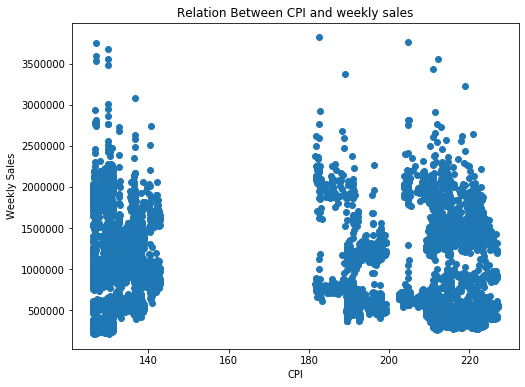

In [50]:
plt.figure(figsize=(8,6))
plt.scatter(datasets["CPI"],datasets["Weekly_Sales"])
plt.title("Relation Between CPI and weekly sales")
plt.xlabel("CPI")
plt.ylabel("Weekly Sales")

Text(0, 0.5, 'Weekly Sales')

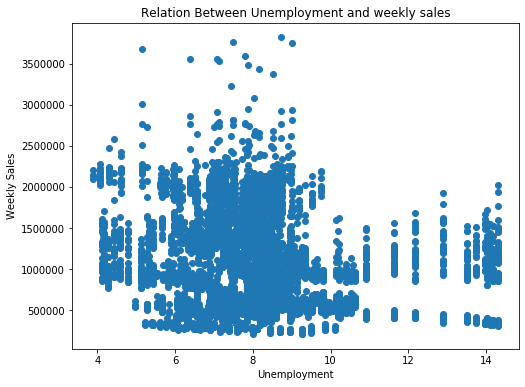

In [51]:
plt.figure(figsize=(8,6))
plt.scatter(datasets["Unemployment"],datasets["Weekly_Sales"])
plt.title("Relation Between Unemployment and weekly sales")
plt.xlabel("Unemployment")
plt.ylabel("Weekly Sales")

Text(0, 0.5, 'Weekly Sales')

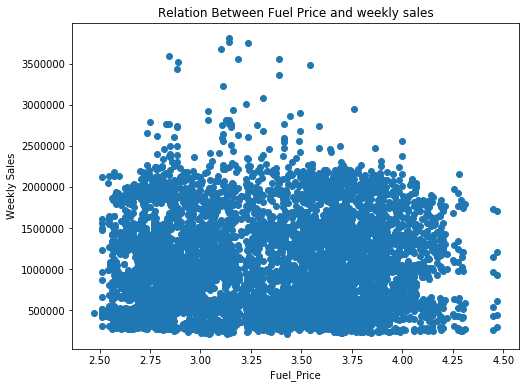

In [52]:
plt.figure(figsize=(8,6))
plt.scatter(datasets["Fuel_Price"],datasets["Weekly_Sales"])
plt.title("Relation Between Fuel Price and weekly sales")
plt.xlabel("Fuel_Price")
plt.ylabel("Weekly Sales")

# Changing dates into days

In [53]:
datasets['days'] = datasets['Date'].dt.day_name()

In [54]:
datasets

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,days
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,Sunday
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,Thursday
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,Friday
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,Friday
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,Monday
...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,Friday
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,Thursday
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,Monday
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,Friday
